In [129]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-data/student_data.csv


In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

df = pd.read_csv('/kaggle/input/student-performance-data/student_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [190]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
df['address'].value_counts()


address
U    307
R     88
Name: count, dtype: int64

In [ ]:
df['sex'].value_counts()


sex
F    208
M    187
Name: count, dtype: int64

In [ ]:
df['internet'].value_counts()

internet
yes    329
no      66
Name: count, dtype: int64

In [ ]:
cols_string = df.columns

In [ ]:
col_counts = dict(df.count(axis=0))
col_types = {c: d for c, d in dict(df.dtypes).items()   if col_counts[c] > 10 }
_is_num = lambda x: x in (np.int64, float)
# separate them
cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])
cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['Dalc', 'Fedu', 'G1', 'G2', 'G3', 'Medu', 'Walc', 'absences', 'age', 'failures', 'famrel', 'freetime', 'goout', 'health', 'studytime', 'traveltime']
CATEGORICAL: ['Fjob', 'Mjob', 'Pstatus', 'activities', 'address', 'famsize', 'famsup', 'guardian', 'higher', 'internet', 'nursery', 'paid', 'reason', 'romantic', 'school', 'schoolsup', 'sex']


In [187]:
for col in cols_numerical:
    if col == 'G1':
        continue;
    print('\nThe correlation matrix with G1 for column: ', col)
    matrix = np.corrcoef(df[col], df['G1'])
    print(matrix)
    


The correlation matrix with G1 for column:  Dalc
[[ 1.         -0.09415879]
 [-0.09415879  1.        ]]

The correlation matrix with G1 for column:  Fedu
[[1.         0.19026994]
 [0.19026994 1.        ]]

The correlation matrix with G1 for column:  G2
[[1.         0.85211807]
 [0.85211807 1.        ]]

The correlation matrix with G1 for column:  G3
[[1.         0.80146793]
 [0.80146793 1.        ]]

The correlation matrix with G1 for column:  Medu
[[1.       0.205341]
 [0.205341 1.      ]]

The correlation matrix with G1 for column:  Walc
[[ 1.         -0.12617921]
 [-0.12617921  1.        ]]

The correlation matrix with G1 for column:  absences
[[ 1.        -0.0310029]
 [-0.0310029  1.       ]]

The correlation matrix with G1 for column:  age
[[ 1.        -0.0640815]
 [-0.0640815  1.       ]]

The correlation matrix with G1 for column:  failures
[[ 1.         -0.35471761]
 [-0.35471761  1.        ]]

The correlation matrix with G1 for column:  famrel
[[1.         0.02216832]
 [0.022

In [184]:
for col in cols_numerical:
    if col == 'G2':
        continue;
    print('\nThe correlation matrix with G2 for column: ', col)
    matrix = np.corrcoef(df[col], df['G2'])
    print(matrix)


The correlation matrix with G2 for column:  Dalc
[[ 1.         -0.06412018]
 [-0.06412018  1.        ]]

The correlation matrix with G2 for column:  Fedu
[[1.         0.16489339]
 [0.16489339 1.        ]]

The correlation matrix with G2 for column:  G1
[[1.         0.85211807]
 [0.85211807 1.        ]]

The correlation matrix with G2 for column:  G3
[[1.         0.90486799]
 [0.90486799 1.        ]]

The correlation matrix with G2 for column:  Medu
[[1.         0.21552717]
 [0.21552717 1.        ]]

The correlation matrix with G2 for column:  Walc
[[ 1.         -0.08492735]
 [-0.08492735  1.        ]]

The correlation matrix with G2 for column:  absences
[[ 1.        -0.0317767]
 [-0.0317767  1.       ]]

The correlation matrix with G2 for column:  age
[[ 1.         -0.14347405]
 [-0.14347405  1.        ]]

The correlation matrix with G2 for column:  failures
[[ 1.         -0.35589563]
 [-0.35589563  1.        ]]

The correlation matrix with G2 for column:  famrel
[[ 1.         -0.018

In [185]:
for col in cols_numerical:
    if col == 'G3':
        continue;
    print('\nThe correlation matrix with G3 for column: ', col)
    matrix = np.corrcoef(df[col], df['G3'])
    print(matrix)


The correlation matrix with G3 for column:  Dalc
[[ 1.         -0.05466004]
 [-0.05466004  1.        ]]

The correlation matrix with G3 for column:  Fedu
[[1.         0.15245694]
 [0.15245694 1.        ]]

The correlation matrix with G3 for column:  G1
[[1.         0.80146793]
 [0.80146793 1.        ]]

The correlation matrix with G3 for column:  G2
[[1.         0.90486799]
 [0.90486799 1.        ]]

The correlation matrix with G3 for column:  Medu
[[1.        0.2171475]
 [0.2171475 1.       ]]

The correlation matrix with G3 for column:  Walc
[[ 1.         -0.05193932]
 [-0.05193932  1.        ]]

The correlation matrix with G3 for column:  absences
[[1.         0.03424732]
 [0.03424732 1.        ]]

The correlation matrix with G3 for column:  age
[[ 1.         -0.16157944]
 [-0.16157944  1.        ]]

The correlation matrix with G3 for column:  failures
[[ 1.         -0.36041494]
 [-0.36041494  1.        ]]

The correlation matrix with G3 for column:  famrel
[[1.         0.05136343]

In [ ]:
a=0.05 


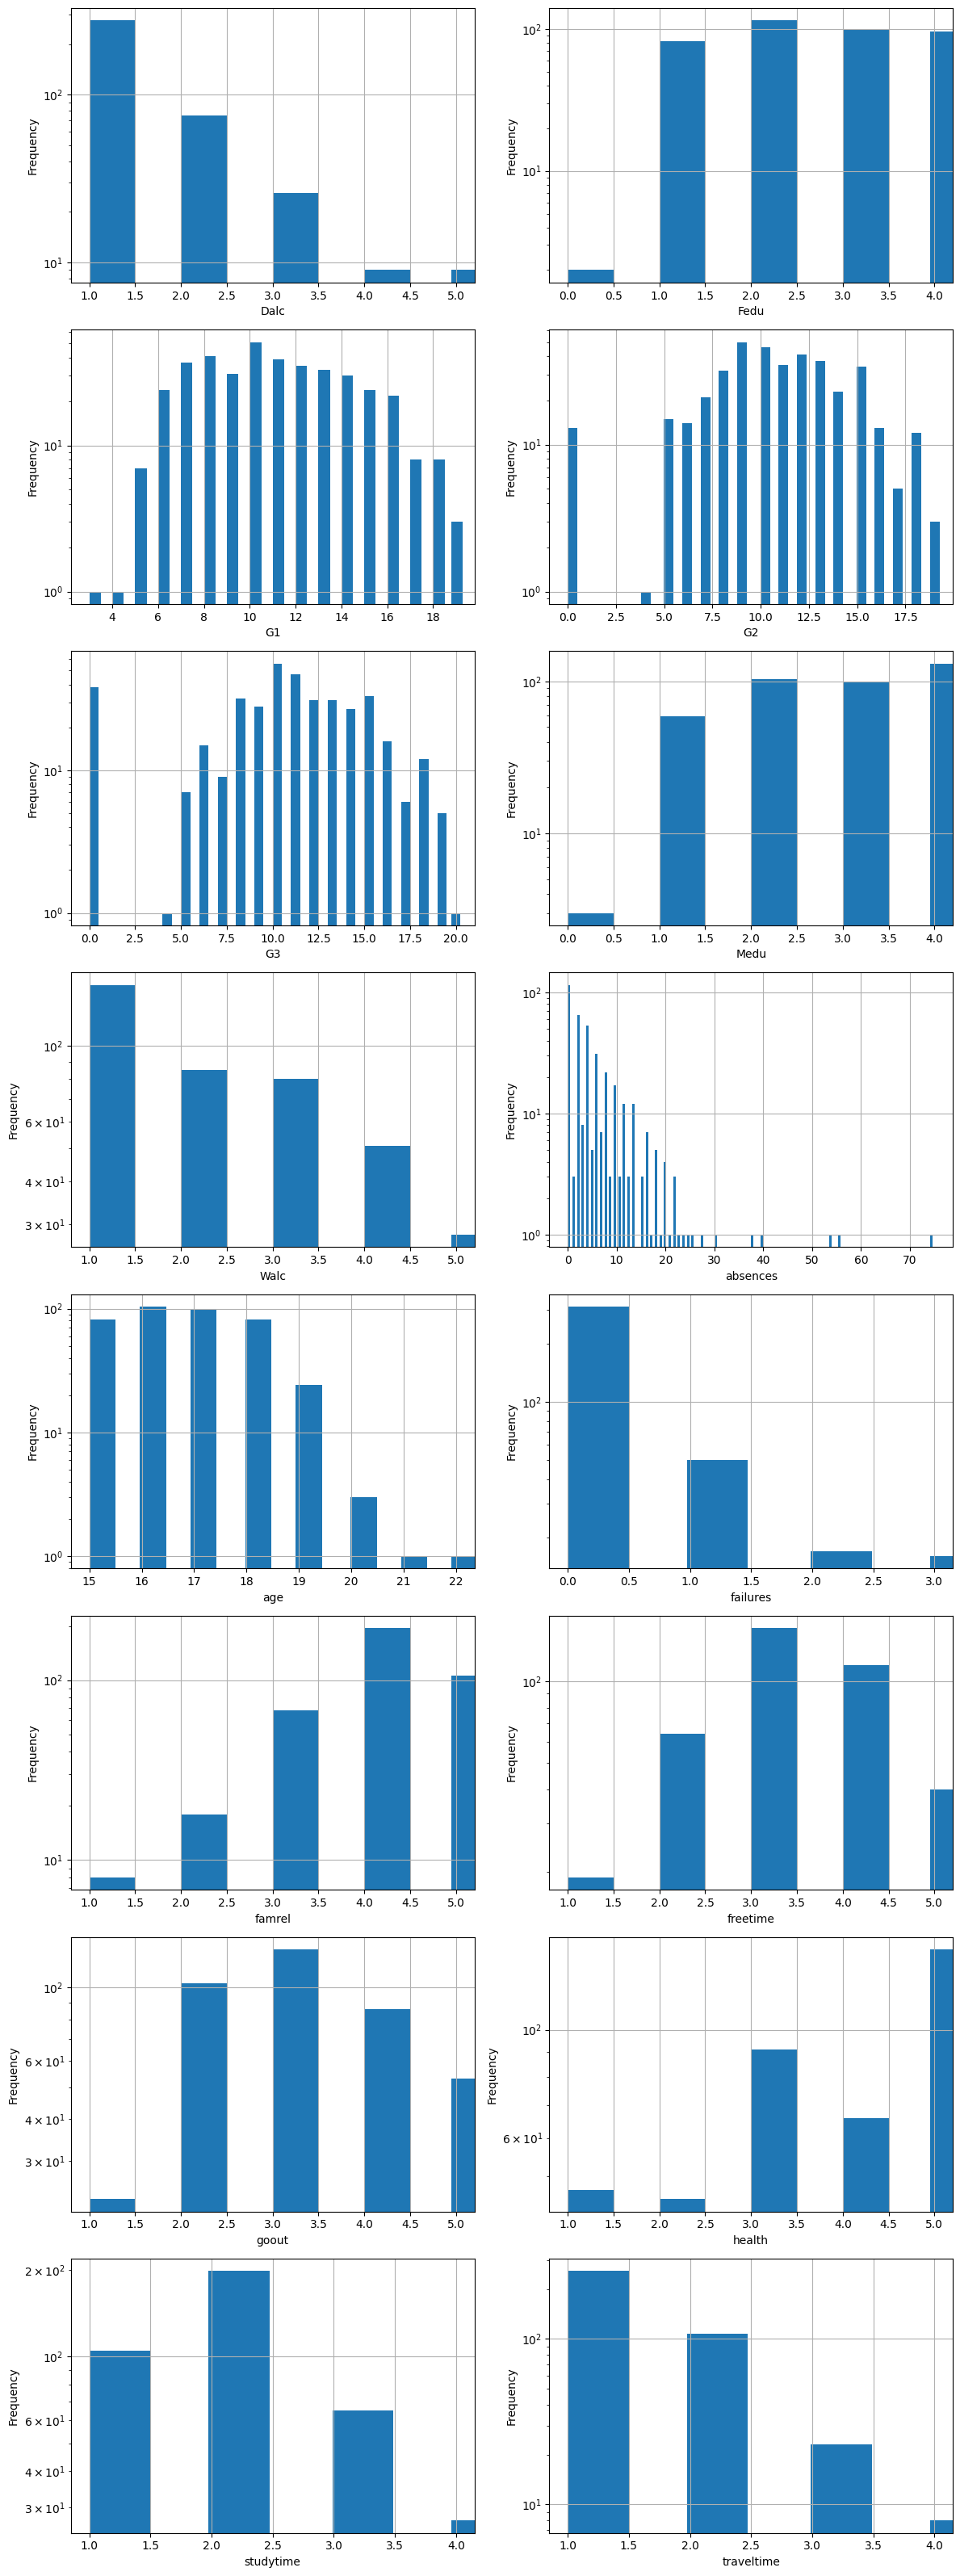

In [ ]:
import math

num_of_rows = math.ceil(len(cols_numerical) / 2)
fig, axarr = plt.subplots(ncols=2, nrows=num_of_rows, figsize=(12, 4 * num_of_rows))
for i, col in enumerate(cols_numerical):
    ax = axarr[i // 2, i % 2] # represents one subplot in the grid.
    #  i // 2 and i % 2 expressions are used to calculate the row and column index of the subplot for the current column.
    df[col].plot.hist(ax=ax, bins=80, logy=True, xlabel=col, grid=True , width = 0.5)
fig.tight_layout() # to ensure that all of the subplots are properly spaced.

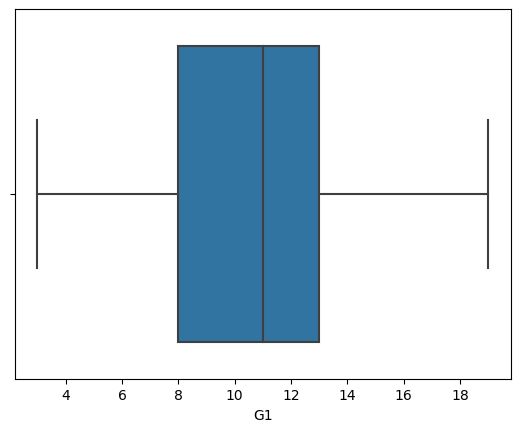

In [ ]:

ax=sns.boxplot(x=df['G1'])
plt.show()

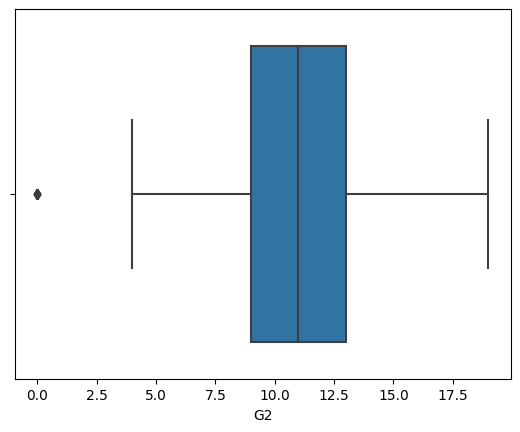

In [ ]:
ax=sns.boxplot(x=df['G2'])
plt.show()

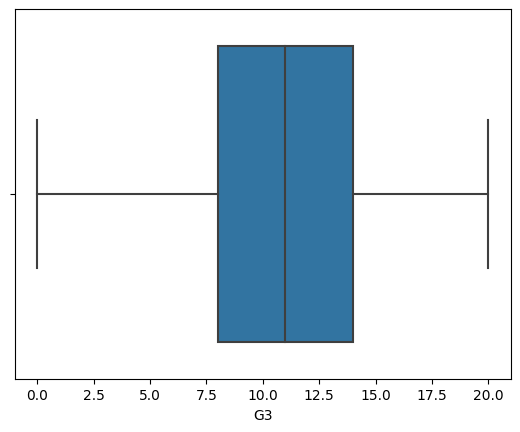

In [ ]:
ax=sns.boxplot(x=df['G3'])
plt.show()

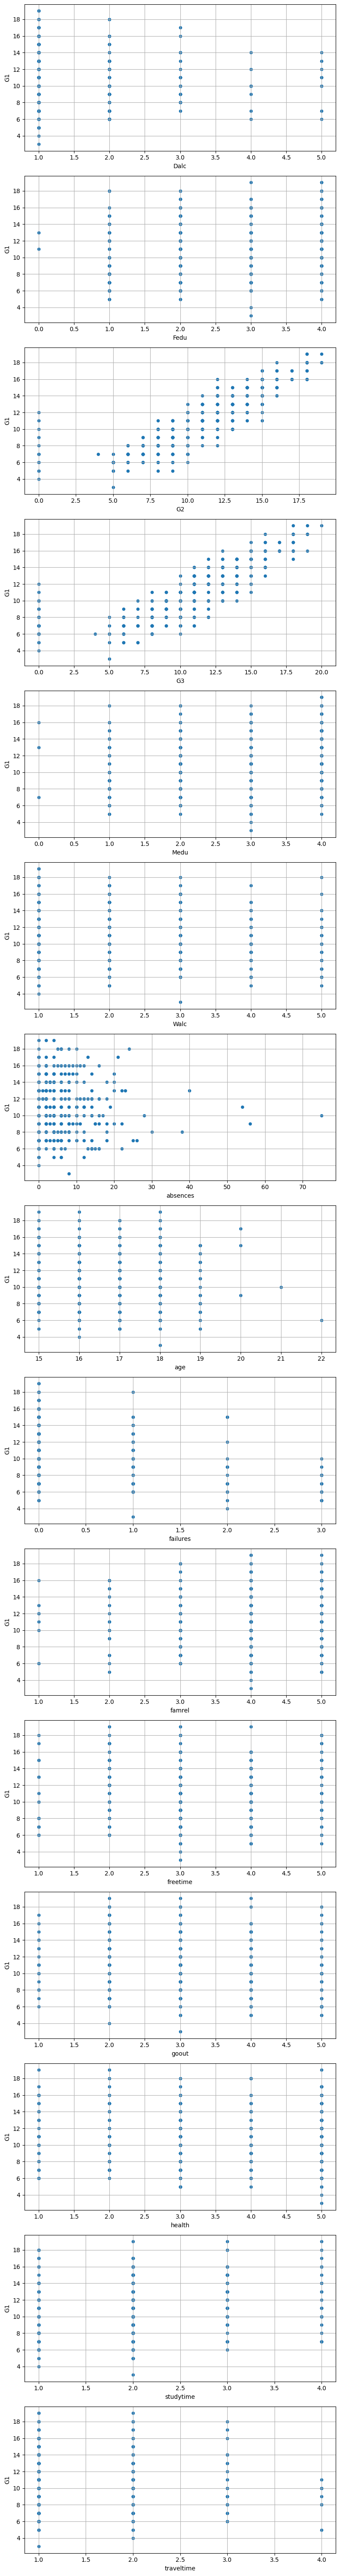

In [ ]:
# Determine the number of rows considering the skipped column
num_of_rows = len(cols_numerical) - 1
fig, axarr = plt.subplots(nrows=num_of_rows, figsize=(8, 4 * num_of_rows))

# Initialize index counter
index = 0

# Loop through each numerical column
for col in cols_numerical:
    # Skip the column 'G1'
    if col == 'G1': 
        continue
    
    # Get the axis for the subplot
    ax = axarr[index]
    
    # Plot scatter for the current column against 'G1'
    df.plot.scatter(ax=ax, x=col, y='G1')
    
    # Set labels and grid
    ax.set_xlabel(col)
    ax.set_ylabel('G1')
    ax.grid(True)
    
    # Increment the index counter
    index += 1

# Adjust layout
fig.tight_layout()




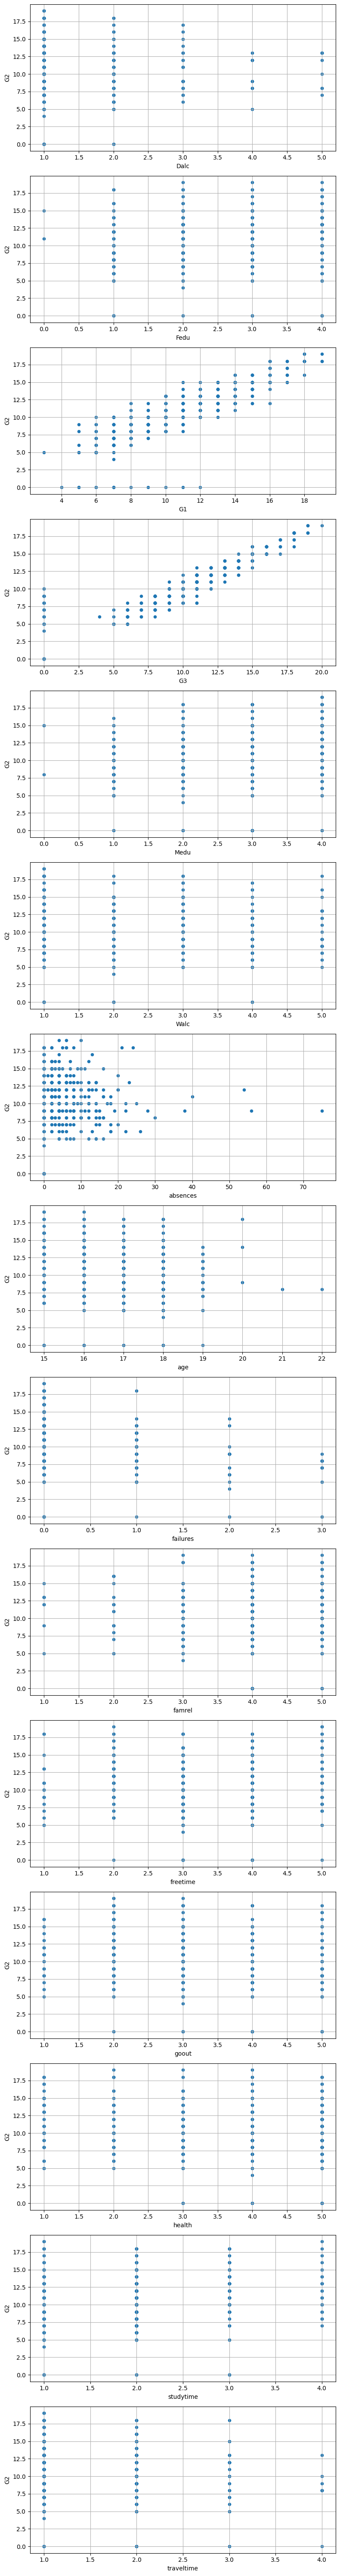

In [ ]:
# Determine the number of rows considering the skipped column
num_of_rows = len(cols_numerical) - 1
fig, axarr = plt.subplots(nrows=num_of_rows, figsize=(8, 4 * num_of_rows))
# Initialize index counter
index = 0
# Loop through each numerical column
for col in cols_numerical:
    # Skip the column 'G2'
    if col == 'G2': 
        continue
    
    # Get the axis for the subplot
    ax = axarr[index]
    
    # Plot scatter for the current column against 'G2'
    df.plot.scatter(ax=ax, x=col, y='G2')
    
    # Set labels and grid
    ax.set_xlabel(col)
    ax.set_ylabel('G2')
    ax.grid(True)
    
    # Increment the index counter
    index += 1
# Adjust layout
fig.tight_layout()

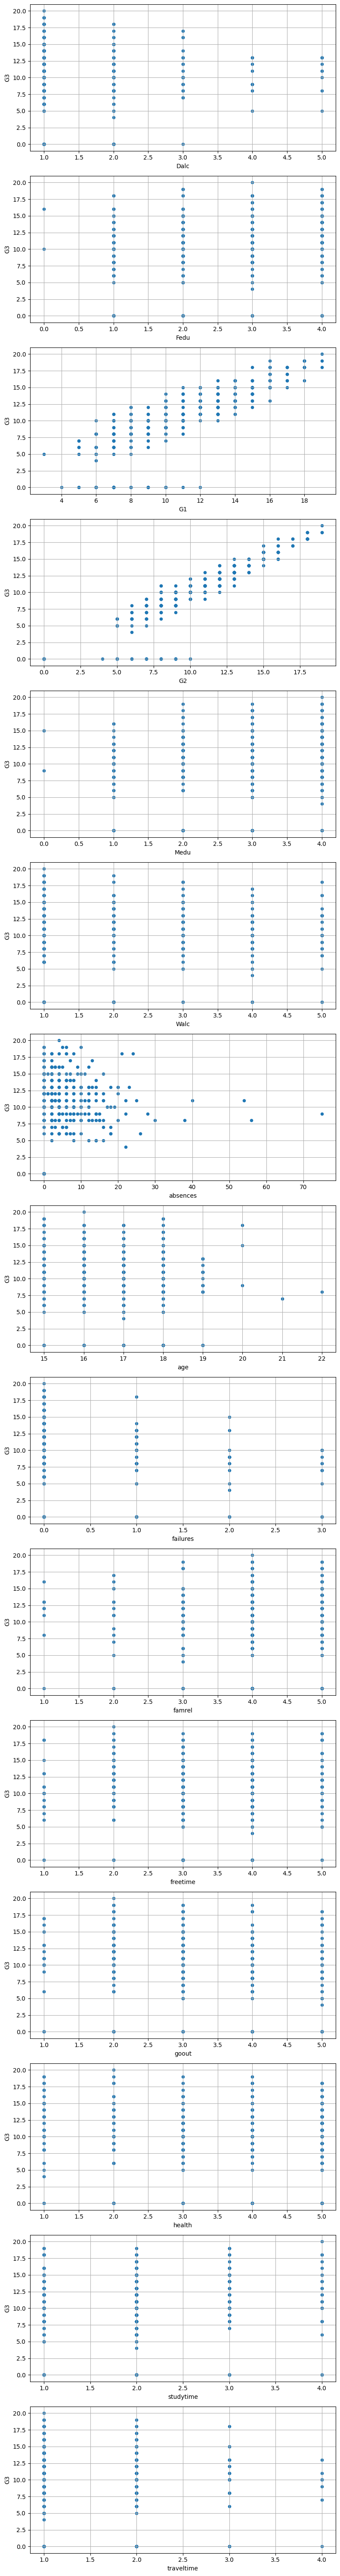

In [ ]:
# Determine the number of rows considering the skipped column
num_of_rows = len(cols_numerical) - 1
fig, axarr = plt.subplots(nrows=num_of_rows, figsize=(8, 4 * num_of_rows))
# Initialize index counter
index = 0
# Loop through each numerical column
for col in cols_numerical:
    # Skip the column 'G3'
    if col == 'G3': 
        continue
    
    # Get the axis for the subplot
    ax = axarr[index]
    
    # Plot scatter for the current column against 'G3'
    df.plot.scatter(ax=ax, x=col, y='G3')
    
    # Set labels and grid
    ax.set_xlabel(col)
    ax.set_ylabel('G3')
    ax.grid(True)
    
    # Increment the index counter
    index += 1
# Adjust layout
fig.tight_layout()

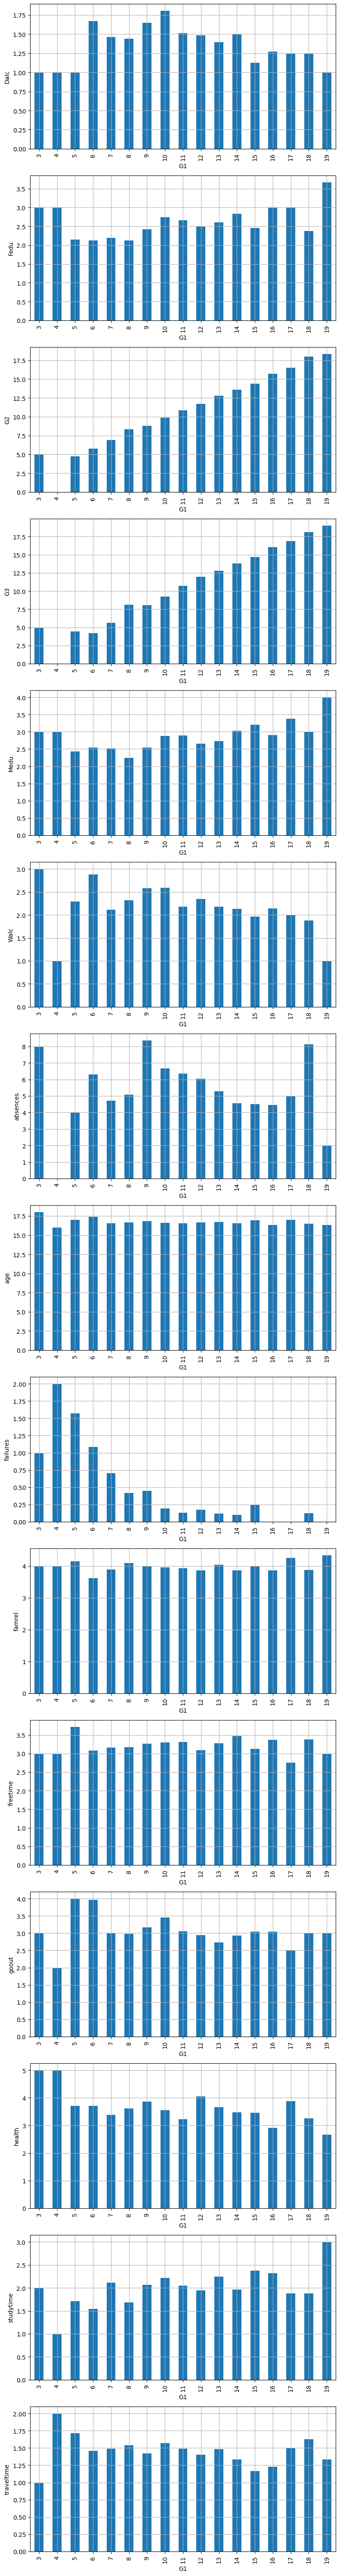

In [ ]:
# Remove 'G1' from the list of numerical columns
cols_numerical_excluding_G1 = [col for col in cols_numerical if col != 'G1']

num_of_rows = len(cols_numerical_excluding_G1)
fig, axarr = plt.subplots(nrows=num_of_rows, figsize=(8, 4 * num_of_rows))

for i, col in enumerate(cols_numerical_excluding_G1):
    if df[col].dtype in ['int64', 'float64']:  # Check if the column contains numerical values
        ax = axarr[i]  # represents one subplot in the grid.
        df.groupby('G1')[col].mean().plot(kind='bar', ax=ax, xlabel='G1', ylabel=col, grid=True)

fig.tight_layout()  # to ensure that all of the subplots are properly spaced.
plt.show()


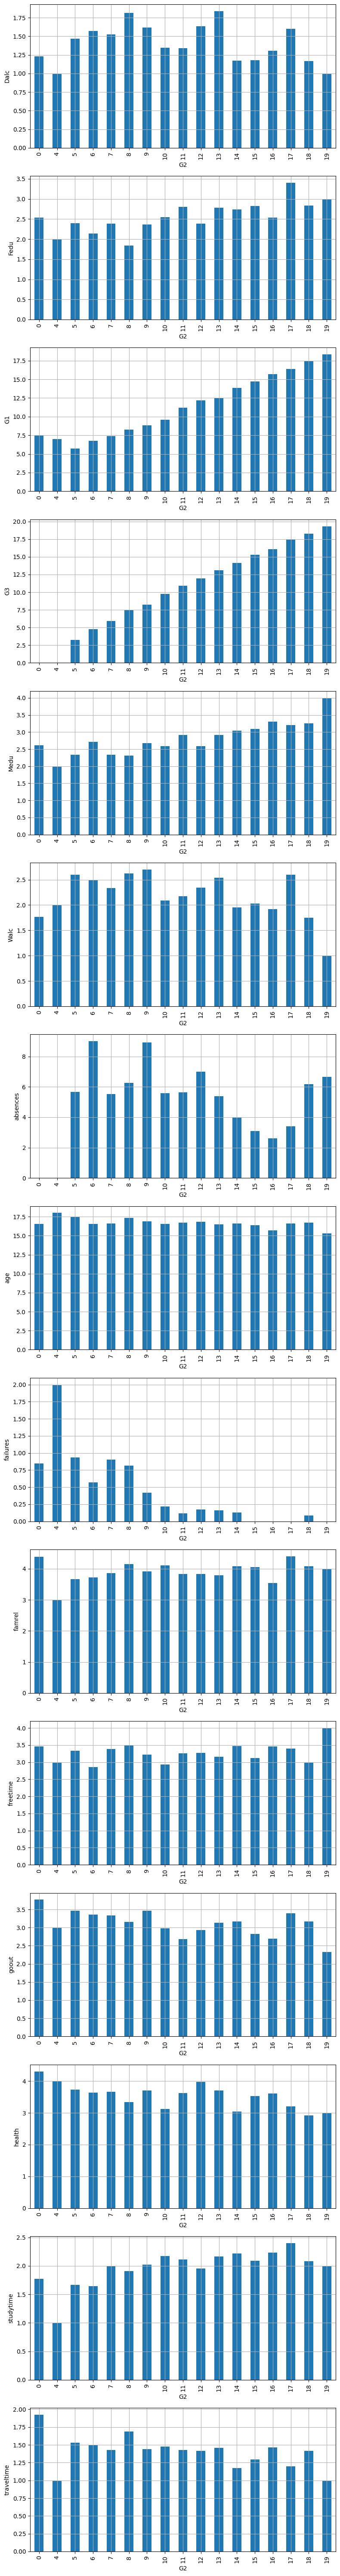

In [ ]:
cols_numerical_excluding_G2 = [col for col in cols_numerical if col != 'G2']

num_of_rows = len(cols_numerical_excluding_G1)
fig, axarr = plt.subplots(nrows=num_of_rows, figsize=(8, 4 * num_of_rows))

for i, col in enumerate(cols_numerical_excluding_G2):
    if df[col].dtype in ['int64', 'float64']:  # Check if the column contains numerical values
        ax = axarr[i]  # represents one subplot in the grid.
        df.groupby('G2')[col].mean().plot(kind='bar', ax=ax, xlabel='G2', ylabel=col, grid=True)

fig.tight_layout()  # to ensure that all of the subplots are properly spaced.
plt.show()


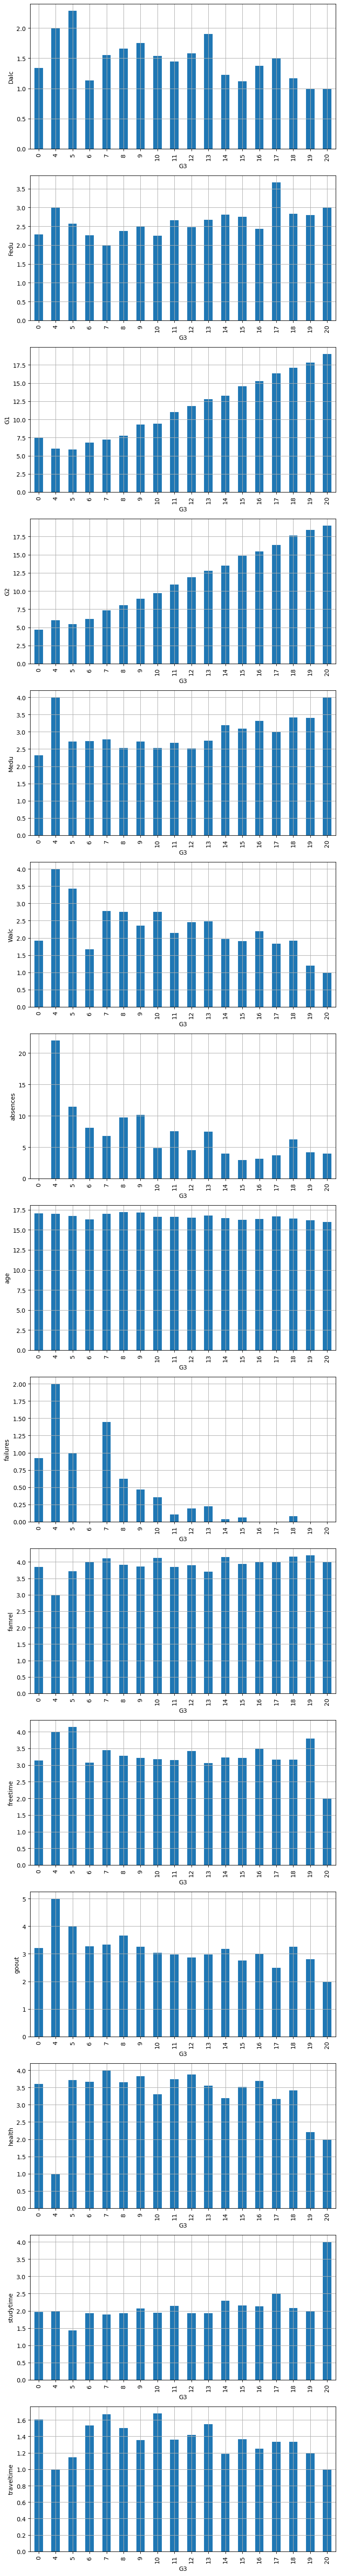

In [ ]:
cols_numerical_excluding_G3 = [col for col in cols_numerical if col != 'G3']

num_of_rows = len(cols_numerical_excluding_G1)
fig, axarr = plt.subplots(nrows=num_of_rows, figsize=(8, 4 * num_of_rows))

for i, col in enumerate(cols_numerical_excluding_G3):
    if df[col].dtype in ['int64', 'float64']:  # Check if the column contains numerical values
        ax = axarr[i]  # represents one subplot in the grid.
        df.groupby('G3')[col].mean().plot(kind='bar', ax=ax, xlabel='G3', ylabel=col, grid=True)

fig.tight_layout()  # to ensure that all of the subplots are properly spaced.
plt.show()


<Axes: >

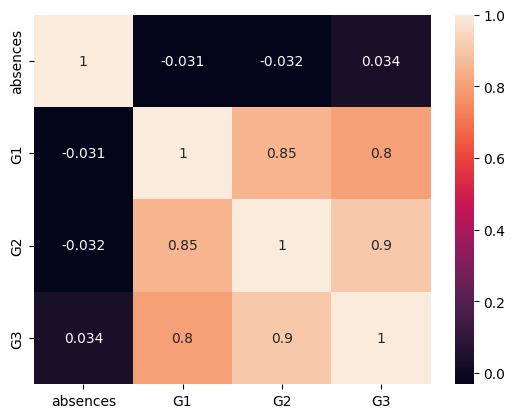

In [ ]:
sns.heatmap(df[['absences', 'G1', 'G2', 'G3']].corr(), annot=True)

<Axes: >

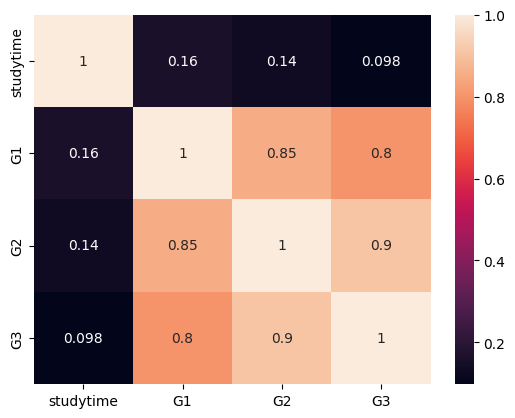

In [ ]:
sns.heatmap(df[['studytime', 'G1', 'G2', 'G3']].corr(), annot=True)

<Axes: >

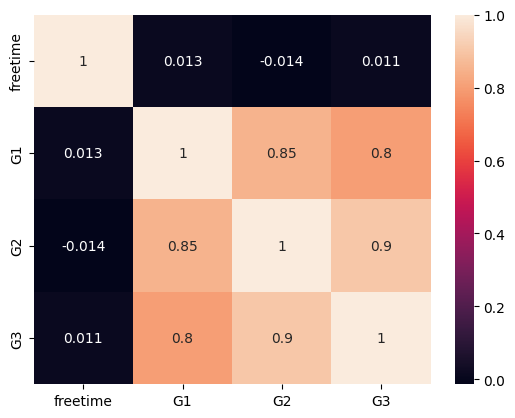

In [ ]:
sns.heatmap(df[['freetime', 'G1', 'G2', 'G3']].corr(), annot=True)